# codelab 01: Explore image data

## Part 1: Explore image data

### Sec01: Using Scikit-image to read an image

In [41]:
from skimage.io import imread

# Read image from local file
img = imread(r'..\example_images\xy_8bit__nuclei_high_dynamic_range.tif')

In [11]:
img.dtype

dtype('uint8')

In [12]:
img.shape

(147, 149)

### Sec02: Show image with matplotlib

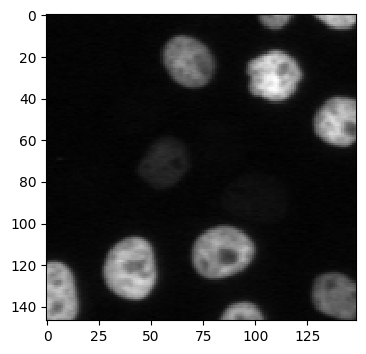

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(img, interpolation='none',cmap = 'gray')

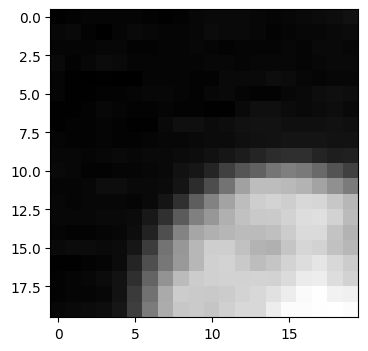

In [21]:
# trimming
cropped_img = img[0:20, 50:70]
plt.figure(figsize=(4,4))
plt.imshow(cropped_img, interpolation='none',cmap = 'gray')

In [ ]:
cropped_img

### Sec03: Look at the intensity profile of the image

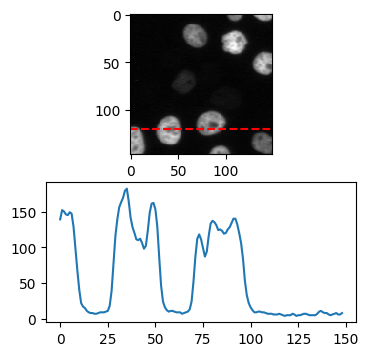

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.subplot(211)
plt.imshow(img, interpolation='none',cmap = 'gray')
# Add a yline at 120
plt.axhline(120, color='r', linestyle='--')

# Look at the intensity profile along the y-axis
plt.subplot(212)
plt.plot(img[120,:])

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28760\1408341511.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(img), interpolation='none',cmap = 'gray')


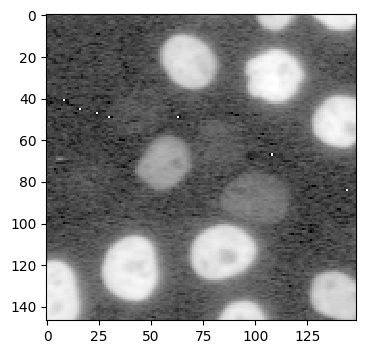

In [43]:
import numpy as np

plt.figure(figsize=(4,4))
plt.imshow(np.log(img), interpolation='none',cmap = 'gray')
plt.show()

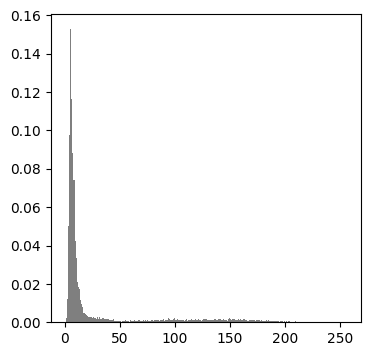

In [29]:
# Show the histogram of the image
plt.figure(figsize=(4,4))
plt.hist(img.flatten(), bins=256, range=(0, 256), density=True, color='black', alpha=0.5)
plt.show()

## Part 1 Bonus: Visualize 3D data with Napari

In [30]:
from skimage.data import cells3d
img = cells3d()

img.shape

(60, 2, 256, 256)

In [32]:
# Split channels
ch0 = img[:,0,:,:]
ch1 = img[:,1,:,:]

print(f'Size of ch0: {ch0.shape}')

Size of ch0: (60, 256, 256)


In [33]:
import napari

viewer = napari.Viewer()

ch0_img = viewer.add_image(ch0, name='Channel 0', colormap='magenta', blending='additive')
ch1_img = viewer.add_image(ch1, name='Channel 1', colormap='green', blending='additive')

In [35]:
# Rescale the image due to unisotropic voxel size
viewer.layers['Channel 0'].scale = [0.29, 0.26, 0.26]
viewer.layers['Channel 1'].scale = [0.29, 0.26, 0.26]


Text(0.5, 1.0, 'Channel 1')

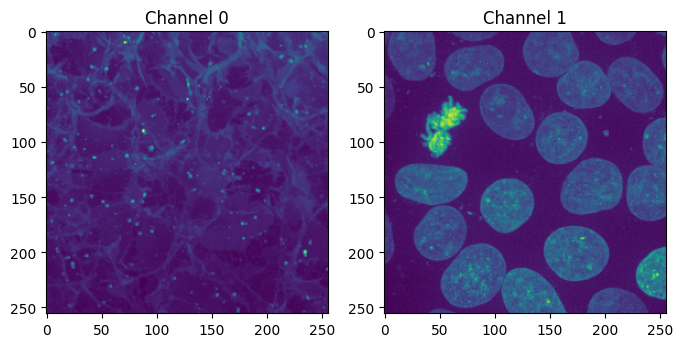

In [39]:
# You can also compress the image to 2D and display with matplotlib
import numpy as np

ch0_2d = np.max(ch0, axis=0)
ch1_2d = np.max(ch1, axis=0)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(ch0_2d, cmap='viridis')
plt.title('Channel 0')
plt.subplot(122)
plt.imshow(ch1_2d, cmap='viridis')
plt.title('Channel 1')
